In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvosAW.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,58,59,60,62,63,64,66,67,68,70,71,72,74,75,76,78,79,80,82,83,84,86,87,88,90,91,92,94,95,96,98,99,100,102,103,104,106,107,108,110,111,112,114,115,116,118,119,120,122,123,124,126,127,128,130,131,132,134,135,136,138,139,140,142,143,144,146,147,148,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168,170,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(convs)

5279

In [5]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [6]:
allUsers=list(set(convs.allNames.sum()))

In [7]:
len(allUsers)

2752

So 2752 unique users participated in our local conversations

In [8]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [9]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [10]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [11]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-23 00:00:00'))]

In [12]:
bUsers=list(set(before.allNames.sum()))

In [13]:
len(bUsers)

778

In [14]:
dUsers=list(set(during.allNames.sum()))

In [15]:
len(dUsers)

1758

In [16]:
aUsers=list(set(after.allNames.sum()))

In [17]:
len(aUsers)

1233

In [18]:
laUsers=list(set(lafter.allNames.sum()))

In [19]:
len(laUsers)

828

In [20]:
len(set(bUsers) & set(dUsers))

465

In [21]:
len(set(bUsers) & set(aUsers))

359

In [22]:
len(set(bUsers) & set(laUsers))

276

In [23]:
len(set(dUsers) & set(aUsers))

696

In [24]:
len(set(dUsers) & set(laUsers))

477

In [25]:
len(set(aUsers) & set(laUsers))

445

In [26]:
len(set(dUsers) & set(aUsers) & set(bUsers) & set(laUsers))

166

* So more than a half of before users were also active during and about hald in after
* And about 40% of during users were active after and almost 30% lafter
* Over 150 users were active in all four periods

# Patterns by users

### One-person conversations

In [27]:
len(convs[convs.userSetLen==1])/float(len(convs))

0.2509945065353287

Quarter of all conversations are users responding to themselves!!!

In [28]:
np.median(convs.convSize[convs.userSetLen==1])

2.0

In [29]:
np.percentile(convs.convSize[convs.userSetLen==1],90)

2.0

In [30]:
max(convs.convSize[convs.userSetLen==1])

12

In [33]:
convs[(convs.userSetLen==1) & (convs.convSize==12)] # add .values to see as list

,Unnamed: 0,tweet0,date0,username0,text0,tweet1,date1,username1,text1,tweet2,...,text43,branching,convSize,allNames,convoEndTime,convoLen,userSetLen,avgTimePerReply,longTailed,medianReplyTime
72,84,269602947242029056,2012-11-17 00:48:46,anthonyd1972,#whitehouse defense bizarre by the day. #petre...,269603217615233026,2012-11-17 00:49:50,anthonyd1972,@anthonyd1972 so if the CIA talking points wer...,269603536260706304,...,0,True,12,[anthonyd1972],2012-11-17 00:56:09,443,1,40.272727,True,81


So the vast majority of these (90%) are one reply to oneself, but there is a self-conversation of 12 steps (rant about politics)

In [34]:
np.median(convs.convoLen[convs.userSetLen==1])

233.0

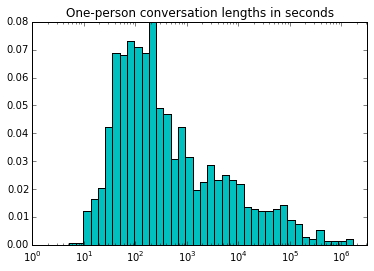

In [35]:
convoLen = convs.convoLen[convs.userSetLen==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('One-person conversation lengths in seconds')

In [36]:
np.median(convs.avgTimePerReply[convs.userSetLen==1])

221.0

In [37]:
np.median(convs.medianReplyTime[convs.userSetLen==1])

224.0

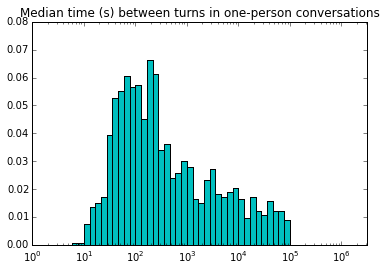

In [38]:
medRepTime=convs[convs.userSetLen==1].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in one-person conversations')

** Takeway:**
* So the conversations users have with themselves tend to be quite a bit shorter than all the conversations
* While the number of tweets still has median of 2.0 and 90th percentile of 2 as well
* The avg and median gaps between replies in the conversation are much shorter than overall
* Pretty intuitive, since they don't have to wait for another party for a reply - no back and forth

### Two-person conversations

In [39]:
len(convs[convs.userSetLen==2])/float(len(convs))

0.7323356696344004

Almost three quarters of the conversations are with just one other person

In [40]:
np.median(convs.convSize[convs.userSetLen==2])

2.0

In [41]:
np.percentile(convs.convSize[convs.userSetLen==2],90)

4.0

In [42]:
max(convs.convSize[convs.userSetLen==2])

43

In [44]:
convs[(convs.userSetLen==2) & (convs.convSize==43)].values

array([[44, 261901117695332352, '2012-10-26 18:44:27', 'Megglezzz',
        "Fuck the @NHL @NHLPA , all of the greedy monkeys that have denied us hockey. If you think we're gonna be forgiving after this you're wrong",
        261904642399686657, '2012-10-26 18:58:27', 'DDougyy',
        '@Megglezzz I read that as "greasy monkeys" instead of greedy. Also thought we could lose some humor with the latest news.',
        261904999309791232, '2012-10-26 18:59:52', 'Megglezzz',
        '@DDougyy greasy monkeys huh? Yeah that could work too. But this seriously makes me ashamed to call myself a fan.',
        261908598827917312, '2012-10-26 19:14:10', 'DDougyy',
        "@Megglezzz I know, right? It's kind off embarrassing.",
        261909742300053504, '2012-10-26 19:18:43', 'Megglezzz',
        '@DDougyy and they wonder why no one respects the sport',
        261911804198936578, '2012-10-26 19:26:54', 'DDougyy',
        '@Megglezzz Yep, I hear ya. :(', 261912049620246528,
        '2012-10-26

* The median suggests that about half of these are still just one tweet and one reply - short exchanges
* The 90th percentile being 4 suggests that bigger proportion of these are longer than in one-person conversations
* The longest convo here is 43 steps - hockey and Dr. WHO, with concerns about Sandy and preparation at the end
* The 3 out of 4 two-person conversations with 12 tweets are about Sandy in some way: evacuation, prep, infrustricture failure, role of global warming

In [45]:
convs[(convs.userSetLen==2) & (convs.convSize==12)].values

array([[48, 263634418994909185, '2012-10-31 13:31:58', 'pacovell',
        '@JOEDOEchef these are pretty different failures, but we should be designing and building better systems here',
        263714145256480768, '2012-10-31 18:48:46', 'JOEDOEchef',
        '@pacovell not so. Both were water related failures(ie floods) occurring at power stations near bodies of water',
        263716756823080960, '2012-10-31 18:59:09', 'pacovell',
        '@JOEDOEchef Tokyo failure, major earthquake and tsunami took generation offline.  Our generation is OK. Still, improved design would help.',
        263717928594198528, '2012-10-31 19:03:48', 'pacovell',
        "@JOEDOEchef I guess what I'm saying is if Tokyo events happened here it would be FAR worse than in Tokyo - they have better infrastructure",
        263720371415576577, '2012-10-31 19:13:30', 'JOEDOEchef',
        '@pacovell my pt exactly!  This is a joke!  This is not a tsunami !!!  If it was this would be apocalypse!',
        2637199974

In [46]:
np.median(convs.convoLen[convs.userSetLen==2])

948.5

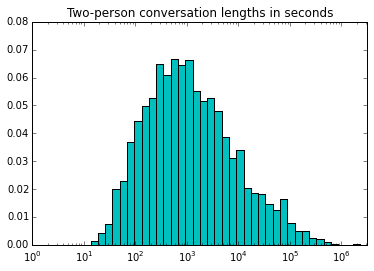

In [47]:
convoLen = convs.convoLen[convs.userSetLen==2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Two-person conversation lengths in seconds')

In [48]:
np.median(convs.avgTimePerReply[convs.userSetLen==2])

582.83333333349992

In [49]:
np.median(convs.medianReplyTime[convs.userSetLen==2])

511.0

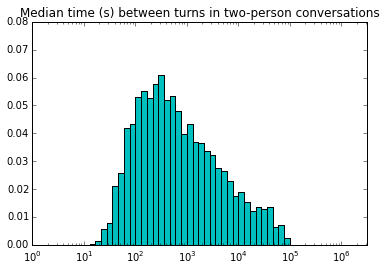

In [50]:
medRepTime=convs[convs.userSetLen==2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in two-person conversations')

** Takeway:**
* The two-person conversations are longer than overall (median)
* And much longer than one-person conversations
* The median number of steps is still 2, but 90th percentile is now 4 -  bigger proportion of these are longer than in one-person conversations
* In addition, the breaks between tweets are longer than overall (438s) and definitely one-person conversations
* **Difference between monolog and dialiog/ personal and social**

### More-than-two person conversations

In [51]:
len(convs[convs.userSetLen>2])/float(len(convs))

0.016669823830270884

Only **1.7%** of the conversations are with more than two people

In [52]:
np.median(convs.convSize[convs.userSetLen>2])

4.0

In [53]:
np.percentile(convs.convSize[convs.userSetLen>2],90)

6.0

In [54]:
max(convs.convSize[convs.userSetLen>2])

11

In [55]:
convs[(convs.userSetLen>2) & (convs.convSize==11)].values

array([[574, 264477309006925826, '2012-11-02 21:21:18', 'NYCMayorsOffice',
        'We have decided to cancel the NYC marathon. The New York Road Runners will have additional information in days ahead for participants.',
        264477517690306562, '2012-11-02 21:22:08', 'ThomasSickler',
        '@NYCMayorsOffice THANK YOU! THANK GOD ITS CANCELED #NYCMarathon',
        264486296720916481, '2012-11-02 21:57:01', 'CG_DarkAngel',
        "@NYCMayorsOffice @MikeBloomberg Thank you for canceling NYC's marathon.  It was the right move.  #fb",
        264570354259865600, '2012-11-03 03:31:02', 'PaulyFook',
        '@NYCMayorsOffice Waiting for the Mayor to take responsibility as to why it was canceled so late. No excuses.',
        264484676402552832, '2012-11-02 21:50:35', 'emburkh',
        '@NYCMayorsOffice @NYCService maybe the runners can #volunteer instead!',
        264482738990632960, '2012-11-02 21:42:53', 'FlemingPhD',
        "@NYCMayorsOffice : Thank God.  Good decision.  We are p

* The median length of these conversations is 4 and the 90th percentile is 6
* This suggests that these are, on average, longer conversations than overall than overall and one- and two-person convos
* The longest convo here is 12 steps - discussion of NYC marathon being cancelled

In [56]:
np.median(convs.convoLen[convs.userSetLen>2])

1213.5

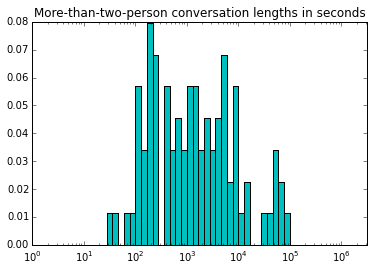

In [60]:
convoLen = convs.convoLen[convs.userSetLen>2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('More-than-two-person conversation lengths in seconds')

The number of these conversations is too small for a clear distribution at this resolution (100 bars)

In [61]:
np.median(convs.avgTimePerReply[convs.userSetLen>2])

412.5

In [62]:
np.median(convs.medianReplyTime[convs.userSetLen>2])

769.75

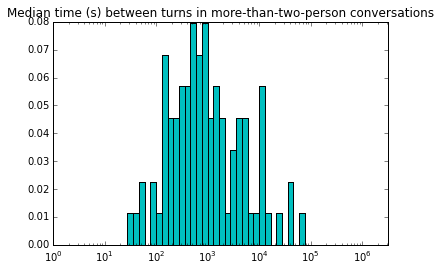

In [63]:
medRepTime=convs[convs.userSetLen>2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in more-than-two-person conversations')

** Takeway:**
* The more-than-two-person conversations are longer than overall (median)
* And much longer than one-person and two-person conversations
* The number of tweets in these conversations are higher than overall and others (median=4, 90th=6)
* But the breaks between tweets are the same as overall and slightly longer than two-person (**CHECK FOR SIG**)
* **As long as it's a dialog/social, more or less the same tempo of conversation is kept**

# Conversation types (# users) across time stages

In [64]:
len(before)/float(len(convs))

0.15438530024625877

In [65]:
len(during)/float(len(convs))

0.39193028982761885

In [66]:
len(after)/float(len(convs))

0.27467323356696344

In [67]:
len(lafter)/float(len(convs))

0.16650880848645577